<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Stock_Price_Prediction_Model_for_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from datetime import *
import pandas_datareader.data as data
start = datetime(2012, 1, 1)
end = datetime.now()
#df = web.DataReader('NFLX', data_source='yahoo', start, end)
df = data.DataReader('INPX', 'yahoo', start, end)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-11,1.19,1.06,1.11,1.12,6185600.0,1.12
2020-05-12,1.44,1.13,1.29,1.24,26776800.0,1.24
2020-05-13,1.26,1.08,1.26,1.14,4915300.0,1.14
2020-05-14,1.38,1.10,1.13,1.20,17628500.0,1.20
2020-05-15,1.24,1.15,1.23,1.17,4602500.0,1.17
2020-05-18,1.32,1.17,1.17,1.19,14601400.0,1.19
2020-05-19,1.42,1.23,1.29,1.29,22406600.0,1.29
2020-05-20,1.58,1.31,1.44,1.44,19017600.0,1.44
2020-05-21,1.43,1.26,1.43,1.30,7398200.0,1.30


In [3]:
df.reset_index(inplace=True)
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1.963000e+03,1.963000e+03,1.963000e+03,1.963000e+03,1.963000e+03,1.963000e+03
mean,9.856270e+05,9.066313e+05,9.474865e+05,9.455731e+05,5.851020e+05,9.455731e+05
std,1.597580e+06,1.443565e+06,1.517082e+06,1.512929e+06,7.488612e+06,1.512929e+06
min,1.110000e+00,1.010000e+00,1.090000e+00,1.060000e+00,0.000000e+00,1.060000e+00
25%,6.480000e+02,5.967000e+02,6.336000e+02,6.291000e+02,0.000000e+00,6.291000e+02
50%,3.240000e+05,3.045600e+05,3.240000e+05,3.240000e+05,0.000000e+00,3.240000e+05
75%,1.259550e+06,1.166400e+06,1.215000e+06,1.215000e+06,1.000000e+03,1.215000e+06
max,1.459620e+07,1.053000e+07,1.053000e+07,1.053000e+07,3.200642e+08,1.053000e+07


In [4]:
corr = df.corr(method='pearson')
corr

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.993373,0.995854,0.995876,-0.048228,0.995876
Low,0.993373,1.000000,0.996783,0.996908,-0.049096,0.996908
Open,0.995854,0.996783,1.000000,0.995682,-0.048821,0.995682
Close,0.995876,0.996908,0.995682,1.000000,-0.048857,1.000000
Volume,-0.048228,-0.049096,-0.048821,-0.048857,1.000000,-0.048857
Adj Close,0.995876,0.996908,0.995682,1.000000,-0.048857,1.000000


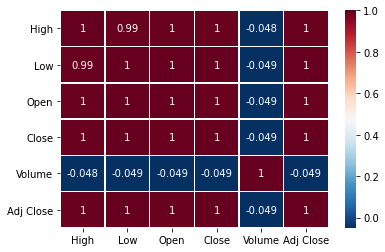

In [5]:
import seaborn as sb
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='RdBu_r', annot=True, linewidth=0.5)


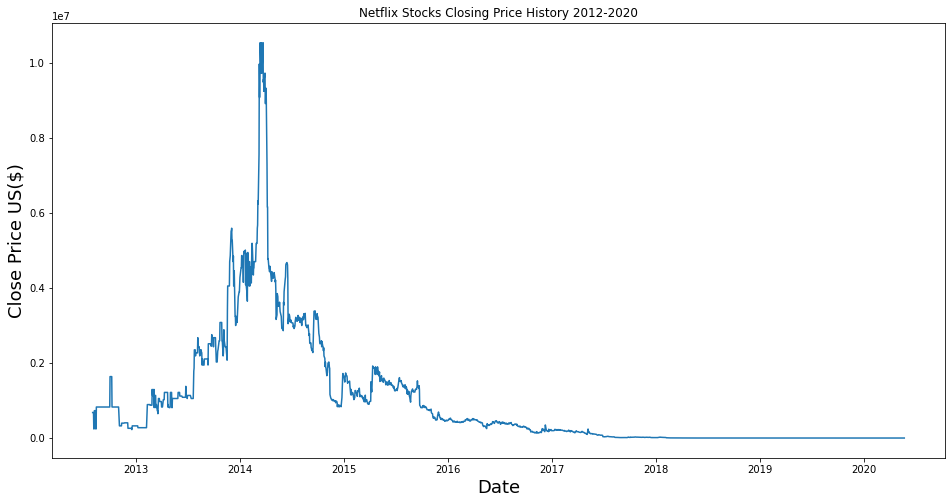

In [6]:
#prepare dataset to work with 
nflx_df=df[['Date','High','Open','Low','Close']]
nflx_df.head(10)
plt.figure(figsize=(16,8))
plt.title('Netflix Stocks Closing Price History 2012-2020')
plt.plot(nflx_df['Date'],nflx_df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price US($)',fontsize=18)
plt.style.use('fivethirtyeight')
plt.show()

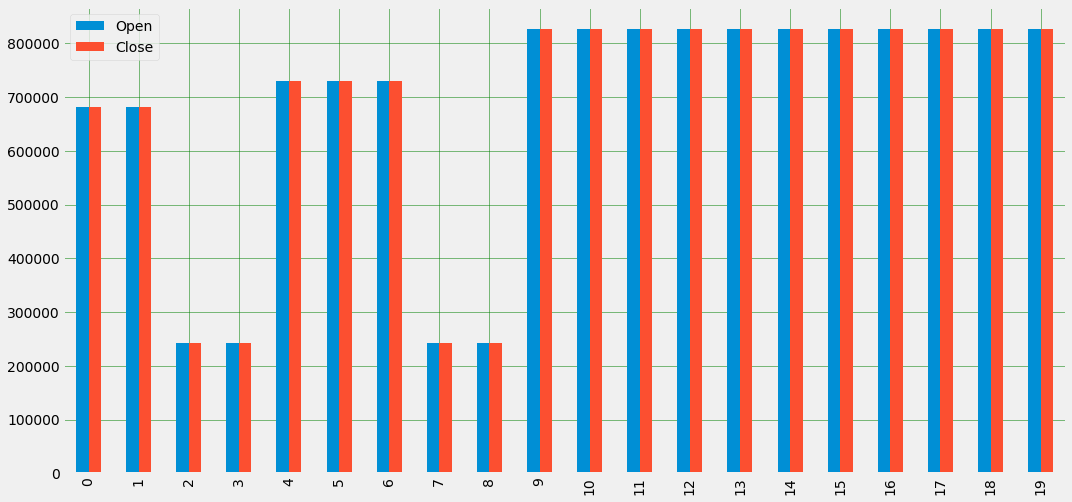

In [7]:
#Plot Open vs Close
nflx_df[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


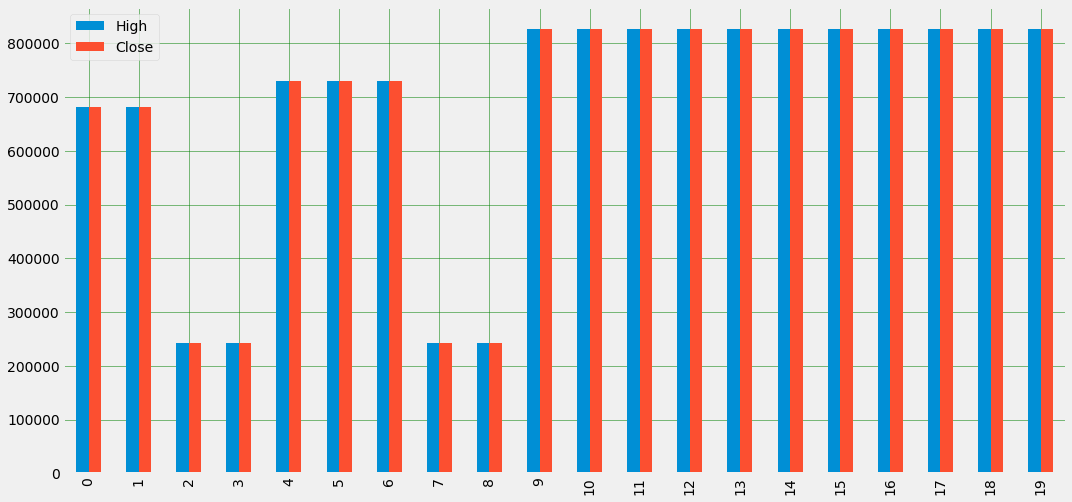

In [8]:
#Plot High vs Close
nflx_df[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

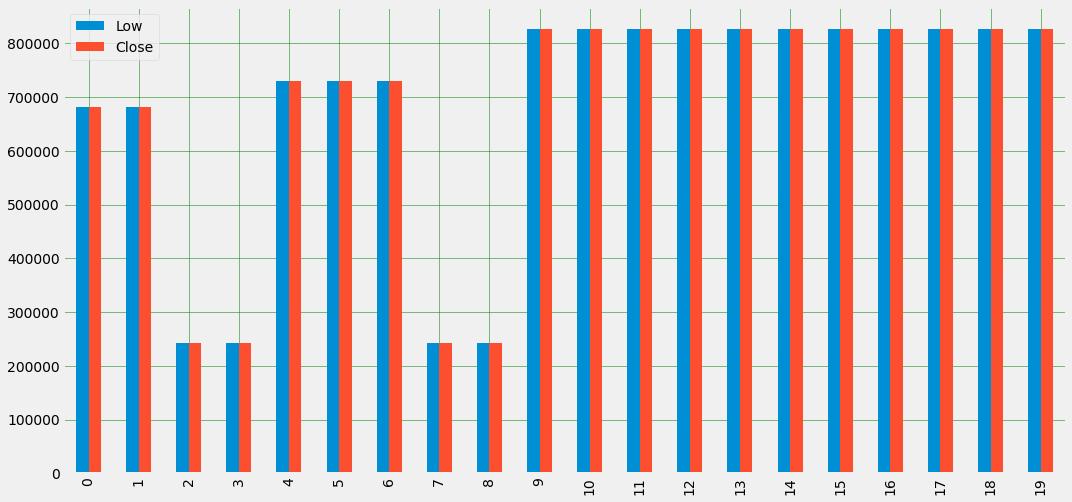

In [9]:
#Plot Low vs Close
nflx_df[['Low','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [10]:
#Date format is DateTime and it will throw error while training so I have created seperate month, year and date entities
nflx_df['Year']=df['Date'].dt.year
nflx_df['Month']=df['Date'].dt.month
nflx_df['Day']=df['Date'].dt.day


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
nfx_df=nflx_df[['Day','Month','Year','High','Open','Low','Close']]
nfx_df.head(10)


,Day,Month,Year,High,Open,Low,Close
0,3,8,2012,680400.0,680400.0,680400.0,680400.0
1,6,8,2012,680400.0,680400.0,680400.0,680400.0
2,7,8,2012,243000.0,243000.0,243000.0,243000.0
3,8,8,2012,243000.0,243000.0,243000.0,243000.0
4,9,8,2012,729000.0,729000.0,729000.0,729000.0
5,10,8,2012,729000.0,729000.0,729000.0,729000.0
6,13,8,2012,729000.0,729000.0,729000.0,729000.0
7,14,8,2012,243000.0,243000.0,243000.0,243000.0
8,15,8,2012,243000.0,243000.0,243000.0,243000.0
9,16,8,2012,826200.0,826200.0,826200.0,826200.0


In [12]:
#separate Independent and dependent variable
X = nfx_df.iloc[:,nfx_df.columns !='Close']
Y= nfx_df.iloc[:, 5]
print(X.shape)  #output: (2093, 6)
print(Y.shape) #output: (2093,)


(1963, 6)
(1963,)


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)
print(x_train.shape) #output: (1569, 6)
print(x_test.shape)  #output: (524, 6)  
print(y_train.shape) #output: (1569,)
print(y_test.shape)  #output: (524,)
#y_test to be evaluated with y_pred for Diff models


(1472, 6)
(491, 6)
(1472,)
(491,)


In [0]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)

In [15]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy:  99.99999999999719


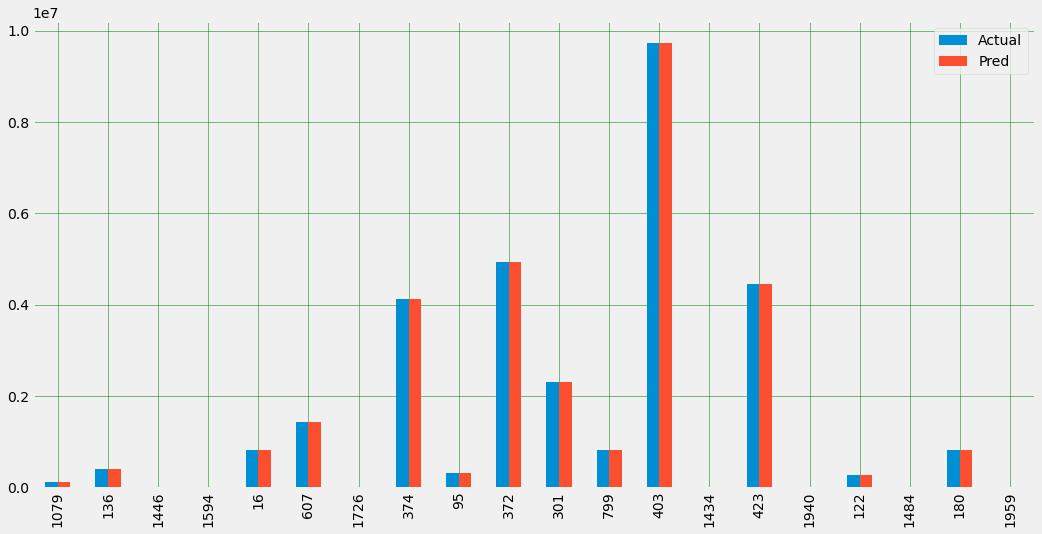

In [16]:
plot_df=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor=KNeighborsRegressor(n_neighbors = 5)
knn_model=knn_regressor.fit(x_train,y_train)
y_knn_pred=knn_model.predict(x_test)

In [18]:
knn_kfold = model_selection.KFold(n_splits=20, random_state=100)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=knn_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  98.76618703415929


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


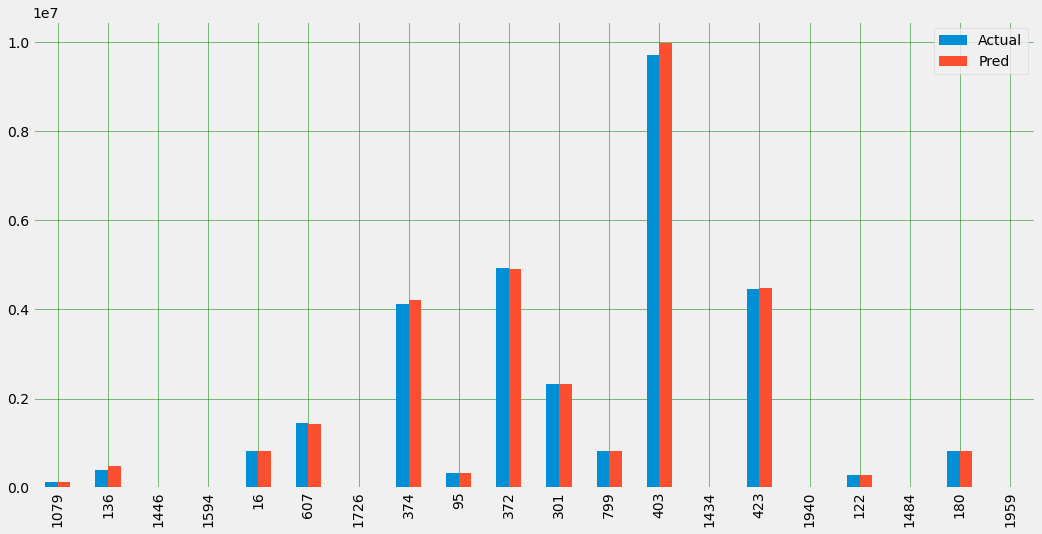

In [19]:
plot_knn_df=pd.DataFrame({'Actual':y_test,'Pred':y_knn_pred})
plot_knn_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [0]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model=svm_regressor.fit(x_train,y_train)
y_svm_pred=svm_model.predict(x_test)

In [0]:
plot_svm_df=pd.DataFrame({'Actual':y_test,'Pred':y_svm_pred})
plot_svm_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error , r2_score
import math
lr_mse=math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Model Root mean square error',lr_mse)
knn_mse=math.sqrt(mean_squared_error(y_test,y_knn_pred))
print('KNN Model Root mean square error',mse)
svm_mse=math.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error SVM',svm_mse)


In [0]:
print('Linear R2: ', r2_score(y_test, y_pred))
print('KNN R2: ', r2_score(y_test, y_knn_pred))
print('SVM R2: ', r2_score(y_test, y_svm_pred))


In [0]:
#https://medium.com/towards-artificial-intelligence/netflix-stock-prediction-model-a-comparative-study-of-linear-regression-k-nearest-neighbor-knn-4527ff17939b